In [25]:
#- - - - - - - - - - - - - - -  Import required modules/packages/dependencies- - - - - - - - - - - - - - - - - - - - - _
import cartopy
import geopandas as gpd
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import os
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import folium
import ipywidgets
from IPython.display import HTML, display
import numpy as np

plt.ion()  # make the plotting interactive



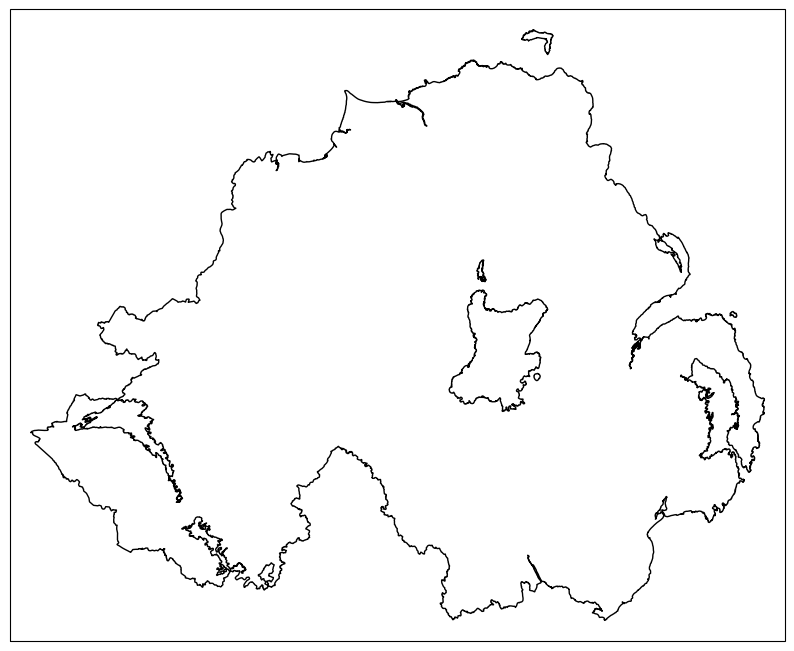

In [51]:
#- - - - - - - - - - - - - - -  Initial Map SetUp- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - -

# generate matplotlib handles to create a legend of features in output map
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

# creates a scale bar of length 20 km in the upper right corner of the map
# adapted this question: https://stackoverflow.com/q/32333870
# answered by SO user Siyh: https://stackoverflow.com/a/35705477
def scale_bar(ax, location=(0.92, 0.95)):
    x0, x1, y0, y1 = ax.get_extent()
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    ax.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=7, transform=ax.projection)
    ax.plot([sbx, sbx - 5000], [sby, sby], color='k', linewidth=6, transform=ax.projection)
    ax.plot([sbx-5000, sbx - 10000], [sby, sby], color='w', linewidth=6, transform=ax.projection)
    ax.plot([sbx-9000, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=ax.projection)

    ax.text(sbx, sby-4500, '10 km', transform=ax.projection, fontsize=6)
    ax.text(sbx-4250, sby-4500, '5', transform=ax.projection, fontsize=6)#  should be 6250 but doesn't place well
    ax.text(sbx-9750, sby-4500, '1', transform=ax.projection, fontsize=6)# should be 11250 but doesn't place well
    ax.text(sbx-12500, sby-4500, '0', transform=ax.projection, fontsize=6)
    #ax.text(sbx-24500, sby-4500, '0 km', transform=ax.projection, fontsize=6)

plt.ion() # make the plotting interactive

# create a crs using ccrs.UTM() that corresponds to our CRS
myCRS = ccrs.UTM(29) # create a Universal Transverse Mercator reference system to transform our data.

# create a figure of size 10x10 (representing the page size in inches
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection=myCRS))


outline = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/egm722_Practicals/egm722/week2/data_files/NI_outline.shp')) # load the outline of Northern Ireland for a backdrop


# first, we just add the outline of Northern Ireland using cartopy's ShapelyFeature
outline_feature = ShapelyFeature(outline['geometry'], myCRS, edgecolor='k', facecolor='w')

xmin, ymin, xmax, ymax = outline.total_bounds
ax.add_feature(outline_feature)  # add the features we've created to the map.


# using the boundary of the shapefile features, zoom the map to our area of interest
ax.set_extent([xmin-5000, xmax+5000, ymin-5000, ymax+5000], crs=myCRS)  # because total_bounds
# gives output as xmin, ymin, xmax, ymax,
# but set_extent takes xmin, xmax, ymin, ymax, we re-order the coordinates here.




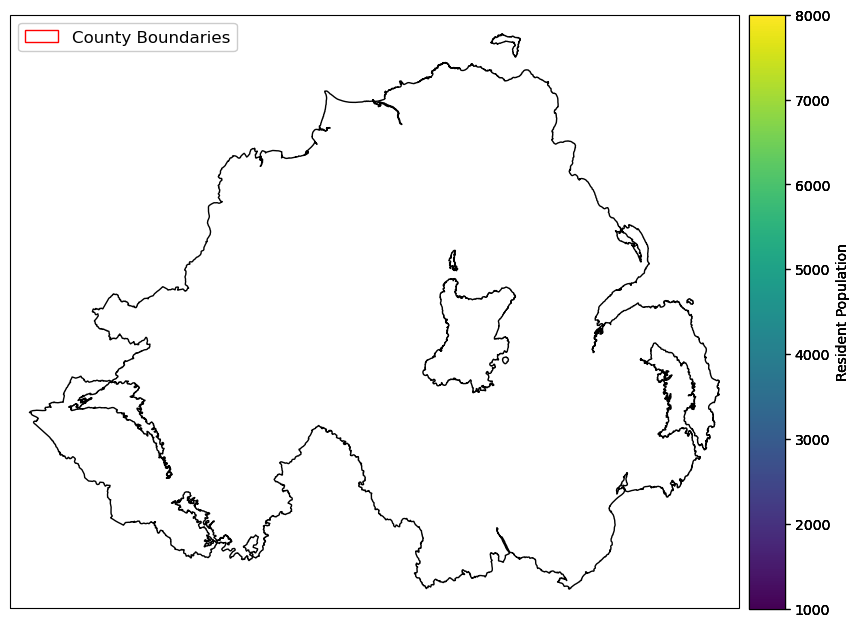

In [21]:
#- - - - - - - - - - - - - - -  Add initial data- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - -

# This adds the bike locations we will be working with
#locations = ("https://www.belfastcity.gov.uk/getmedia/f68a4e53-68df-429c-8ac8-a8be9411ab73/belfast-bike-stations-updated-25-june-2021.csv")
#bike_station_locations= pd.read_csv(locations)# csv data is now a dataframe
#TODO: convert to geodataframe

#TODO: add additional layers


# load the necessary data here and transform to a UTM projection
Counties = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/egm722_Practicals/egm722/week2/data_files/Counties.shp'))
Wards = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/egm722_Practicals/egm722/week3/data_files/NI_Wards.shp'))

Counties = Counties.to_crs(epsg=2157)
Wards = Wards.to_crs(epsg=2157)

# pick colors, add features to the map
county_colors = ['firebrick', 'seagreen', 'royalblue', 'coral', 'violet', 'cornsilk']

# get a list of unique names for the county boundaries
county_names = list(Counties.CountyName.unique())
county_names.sort()  # sort the counties alphabetically by name

# next, add the municipal outlines to the map using the colors that we've picked.
# here, we're iterating over the unique values in the 'CountyName' field.
# we're also setting the edge color to be black, with a line width of 0.5 pt.
# Feel free to experiment with different colors and line widths.
for ii, name in enumerate(county_names):
    feat = ShapelyFeature(Counties.loc[Counties['CountyName'] == name, 'geometry'],  # first argument is the geometry
                          myCRS,  # second argument is the CRS
                          edgecolor='k',  # outline the feature in black
                          facecolor=county_colors[ii],  # set the face color to the corresponding color from the list
                          linewidth=1,  # set the outline width to be 1 pt
                          alpha=0.25)  # set the alpha (transparency) to be 0.25 (out of 1)
    ax.add_feature(feat)  # once we have created the feature, we have to add it to the map using ax.add_feature()

# generate a list of handles for the county datasets
county_handles = generate_handles(Counties.CountyName.unique(), county_colors, alpha=0.25)

fig


In [ ]:

#- - - - - - - - - - - - - - -  Carry out spatial analyses- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#oneKmBuffer = bike_station_locations.geometry.buffer(1)
#oneKmBuffer.head()
#print(oneKmBuffer.head())
#for index, row in bike_station_locations.iterrows():



#TODO: define and code for further analyses



# your analysis goes here...

join = gpd.sjoin(Counties, Wards, how='inner', lsuffix='left', rsuffix='right') # perform the spatial join of counties and wards
joinedData = join.groupby(['CountyName'])['Population'].sum() # assign summary data to variable to be printed
print(joinedData)
# below here, you may need to modify the script somewhat to create your map.






# to make a nice colorbar that stays in line with our map, use these lines:
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)


# plot the ward data into our axis, using
ward_plot = Wards.plot(column='Population', ax=ax, vmin=1000, vmax=8000, cmap='viridis',
                       legend=True, cax=cax, legend_kwds={'label': 'Resident Population'})


county_outlines = ShapelyFeature(Counties['geometry'], myCRS, edgecolor='r', facecolor='none')


ax.add_feature(county_outlines)
county_handles = [mpatches.Rectangle((0, 0), 1, 1, facecolor='none', edgecolor='r')]

ax.legend(county_handles, ['County Boundaries'], fontsize=12, loc='upper left', framealpha=1)

# save the figure
fig.savefig('sample_map22.png', dpi=300, bbox_inches='tight')

fig

In [ ]:
#- - - - - - - - - - - - - - -  Present results from analysis- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#TODO: present results


#- - - - - - - - - - - - - - - Output the final map- - - - - - - - - - - - - - -

# add gridlines below
gridlines = ax.gridlines(draw_labels=True,
                         xlocs=[-8, -7.5, -7, -6.5, -6, -5.5],
                         ylocs=[54, 54.5, 55, 55.5],
                         linewidth = 0.5, color = 'gray', alpha = 0.5, linestyle='--')

gridlines.right_labels = False
gridlines.bottom_labels = False
gridlines.left_labels = True
gridlines.top_labels = True

In [ ]:


''''# - - - - - - - - - - - - - - -  Create the Folium map- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# this creates the map and centres the map on the mean x,y of all bike station locations
#map = folium.Map(location=[bike_station_locations.Latitude.mean(), bike_station_locations.Longitude.mean()],
                 zoom_start=14, control_scale=True)

# - - - - - - - - - - - - - - -  Add data to the map- - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - - - - -
# this adds the bike station point locations to the map and uses the location field as a popup label
#for index, row in bike_station_locations.iterrows():
#    lat = row['Latitude']
#    long = row['Longitude']
#    name = row['Location']

 #   folium.Marker([lat, long], name).add_to(map)

# add data layers control
#folium.LayerControl().add_to(map)
# TODO: configure widget
#- - - - - - - - - - - - - - - Finishing Touches- - - - - - - - - - - - - - -- - - - - - - - - - - - - - - - - - - - - -
#this adds a title to the map   
#mapTitle = 'Belfast Bike Locations'
#title_html = '''
#             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
#            '''.format(mapTitle)
#
#map.get_root().html.add_child(folium.Element(title_html))

#- - - - - - - - - - - - - - - Save the Folium map- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
##this saves the map as html
#map.save("Belfast bikes.html")